# AZUBI AFRICA TALENT MOBILITY PROGRAM - Data Analytics Pathway

## Introduction


As a member of our data analytics team, your role will involve creating tools that use our operational data to help the business achieve its goals. 

For this project, the objective is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset. 

### Tasks include: 

1. Conduct Exploratory Data Analysis (EDA) 

Identify patterns, correlations, and any necessary data preprocessing steps, such as handling missing values, outliers, and data normalization. 

2. Feature Engineering 

Evaluate which features might be most relevant to predicting client subscription and consider creating new features if applicable. 

3. Build a Predictive Model 

Use a machine learning algorithm of choice to build a model predicting the subscription outcome. 

4. Evaluate Model Performance 

Use appropriate metrics such as accuracy, precision, recall, and F1 score to assess model effectiveness. Consider any imbalanced classes and adjust accordingly, possibly using techniques like oversampling, undersampling, or adjusting the class weights. 

5. Explain the Findings and Insights  

Summarize key findings from the EDA and insights from the model, such as which features were most impactful, common characteristics of clients likely to subscribe, and actionable recommendations for the marketing team. 



### Data Dictionary

1. Relevant Information:

   The data is related with direct marketing campaigns of a banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

2. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

3. Number of Attributes: 16 + output attribute.

4. Attribute information:

   Input variables:
   **bank client data:**

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric) 

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   **related with the last contact of the current campaign:**

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

   10 - day: last contact day of the month (numeric)

   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

   12 - duration: last contact duration, in seconds (numeric)

   **other attributes:**

   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

   15 - previous: number of contacts performed before this campaign and for this client (numeric)

   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  **Output variable (desired target):**

   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

5. Missing Attribute Values: None

### Analytical Question

1) How doe age affect whether a bank customer will subscribed a term deposit?

2) How does marital status and default status affect subscriptions to term deposit?

3) How does contact channel affect customer's subscription to term deposit?

4) How does job type and personal loan affect subscriptions to term deposit?

### Hypothesis




Installation of Packages and Models

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib

### Loading Datasets    

In [202]:
bank_full_df = pd.read_csv("Data/bank-full.csv", sep=';')

bank_df = pd.read_csv("Data/bank.csv", sep=';')

#bank_add_full_df = pd.read_csv("Data/bank-additional-full.csv", sep=';')

#bank_add_df = pd.read_csv("Data/bank-additional.csv", sep=';')

In [203]:
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [204]:
bank_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [205]:
bank_full_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [206]:
#bank_add_full_df.head()

In [207]:
#bank_add_full_df.info()

In [208]:
#bank_add_full_df.describe(include='all').T

Test Data

In [209]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [210]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [211]:
bank_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


In [212]:
#bank_add_df.head()

### Observations

**Checking for null values and duplicates**

In [213]:
bank_full_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [214]:
bank_full_df.duplicated().sum()

np.int64(0)

In [215]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [216]:
bank_df.duplicated().sum()

np.int64(0)

**Observations**

- There are no missing values in both the bank-full and bank datasets.

## EDA

Univariate distributions

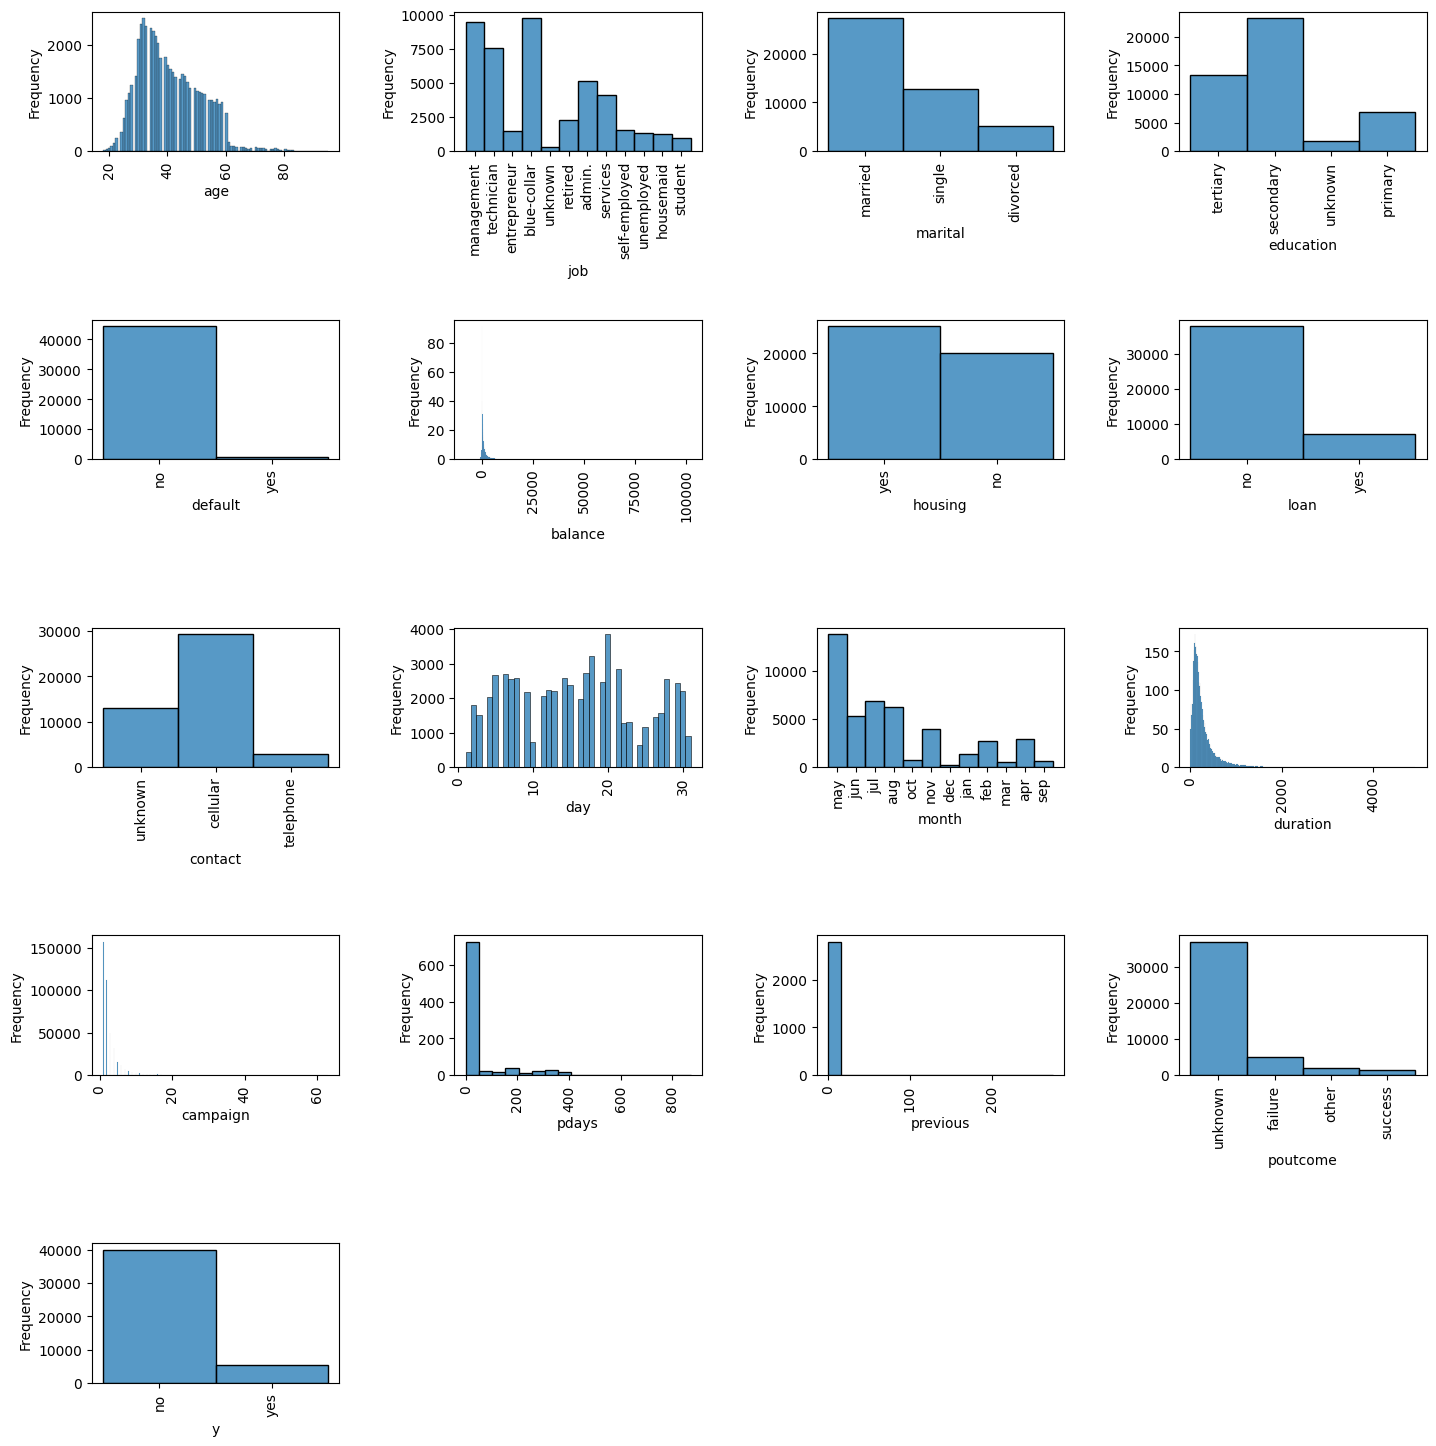

In [217]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(bank_full_df):
    plt.subplot(5,4, i + 1)
    sns.histplot(bank_full_df,x=bank_full_df[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

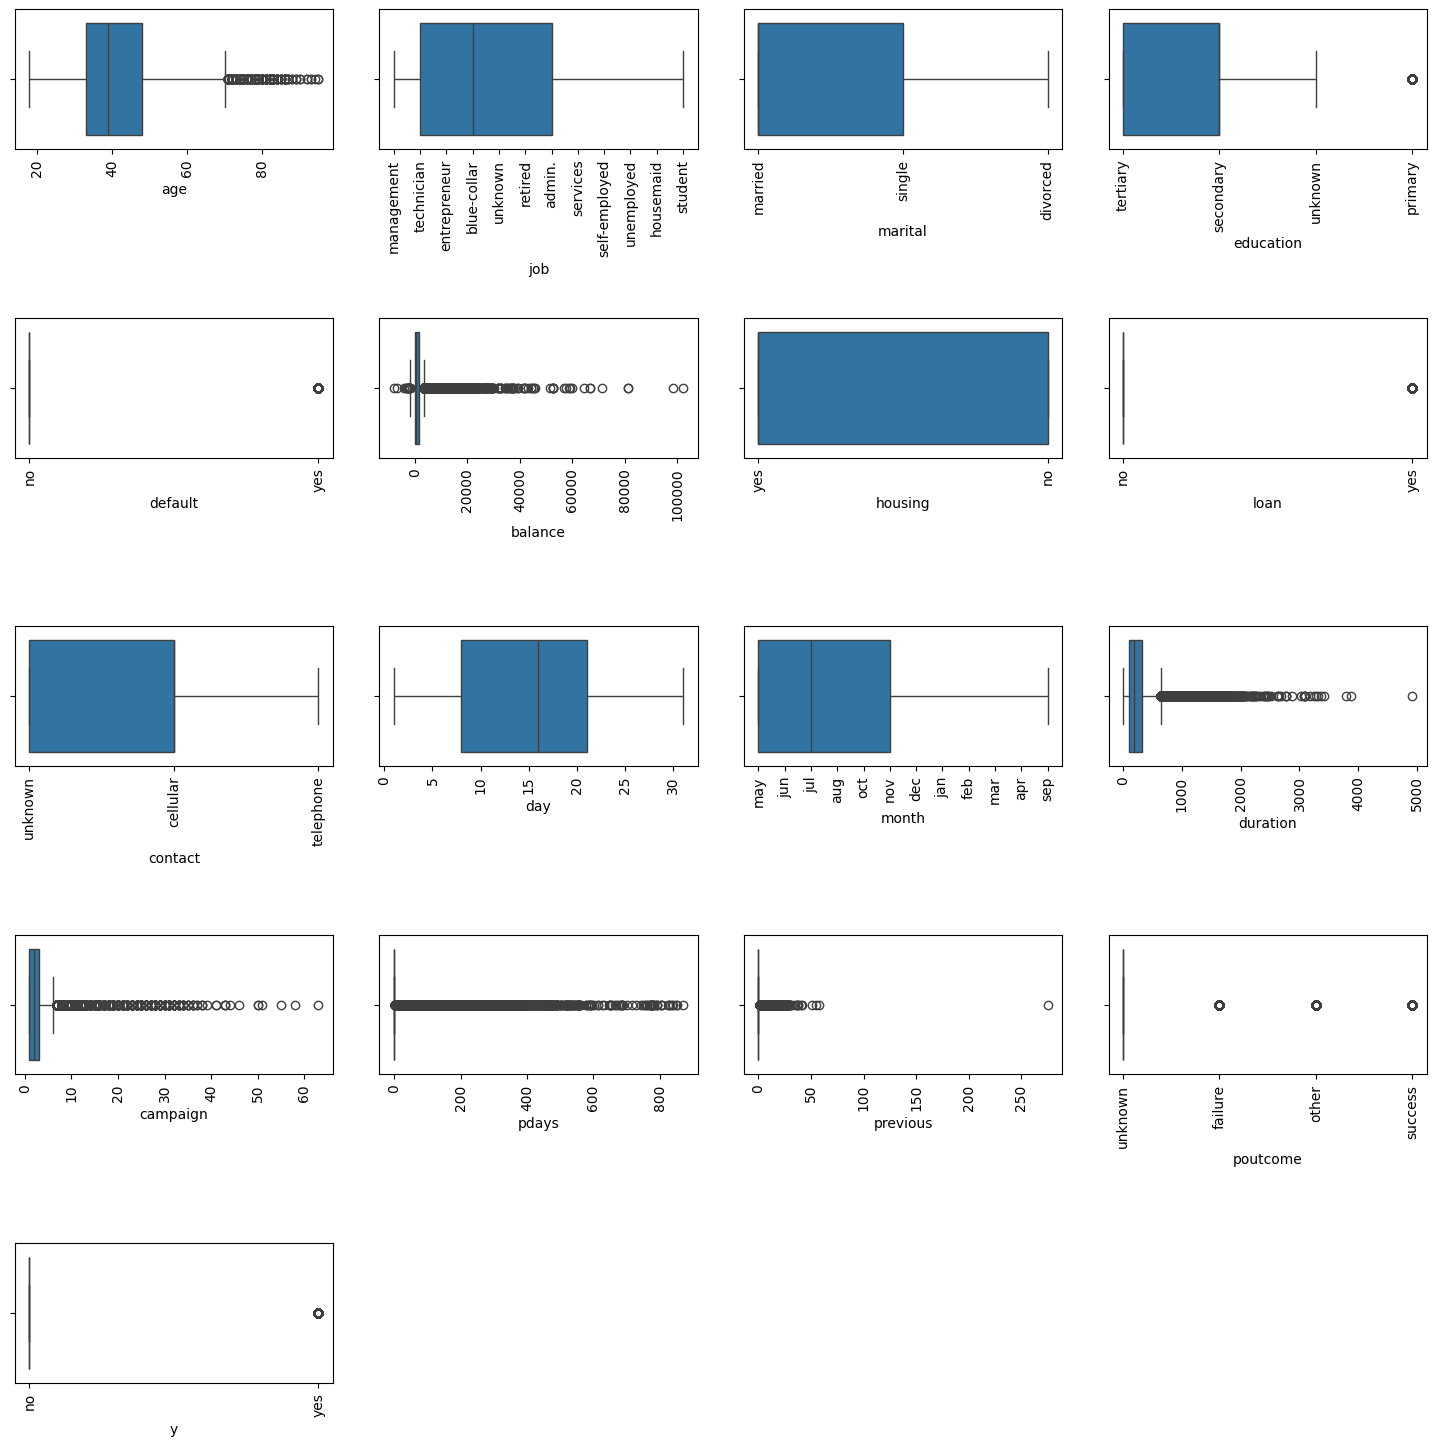

In [218]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(bank_full_df):
    plt.subplot(5,4, i + 1)
    sns.boxplot(bank_full_df,x=bank_full_df[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

**Observations**

1) Majority of bank's customers are between the ages of 20 and 60 years old
2) The Jobs of most bank's customers are in the field of Management, Techniciens, blue collar, admin and services, these professions forms the bulk of the banks customers
3) Most customers are married
4) Most customers have secondary education
5) The majority of customers have no credit in default
6) The average yearly balance is around 1500 euros
7) Most customers have housing loans
8) Most customers don't have personal loans, only about 7500 customers have personal loan
9) Most customers were last contacted via cellular communication
10) Most customers were last contacted in the month of May and June
11) The duration of last contact is around 250 seconds, which means most customers were contacted within the last 4 minutes
12) The outcome of the previous campaign was mostly unknown
13) Most customers had not subscribed to the previous campaign or term deposit
14) Most of the numerical variables have outliers in their distributions

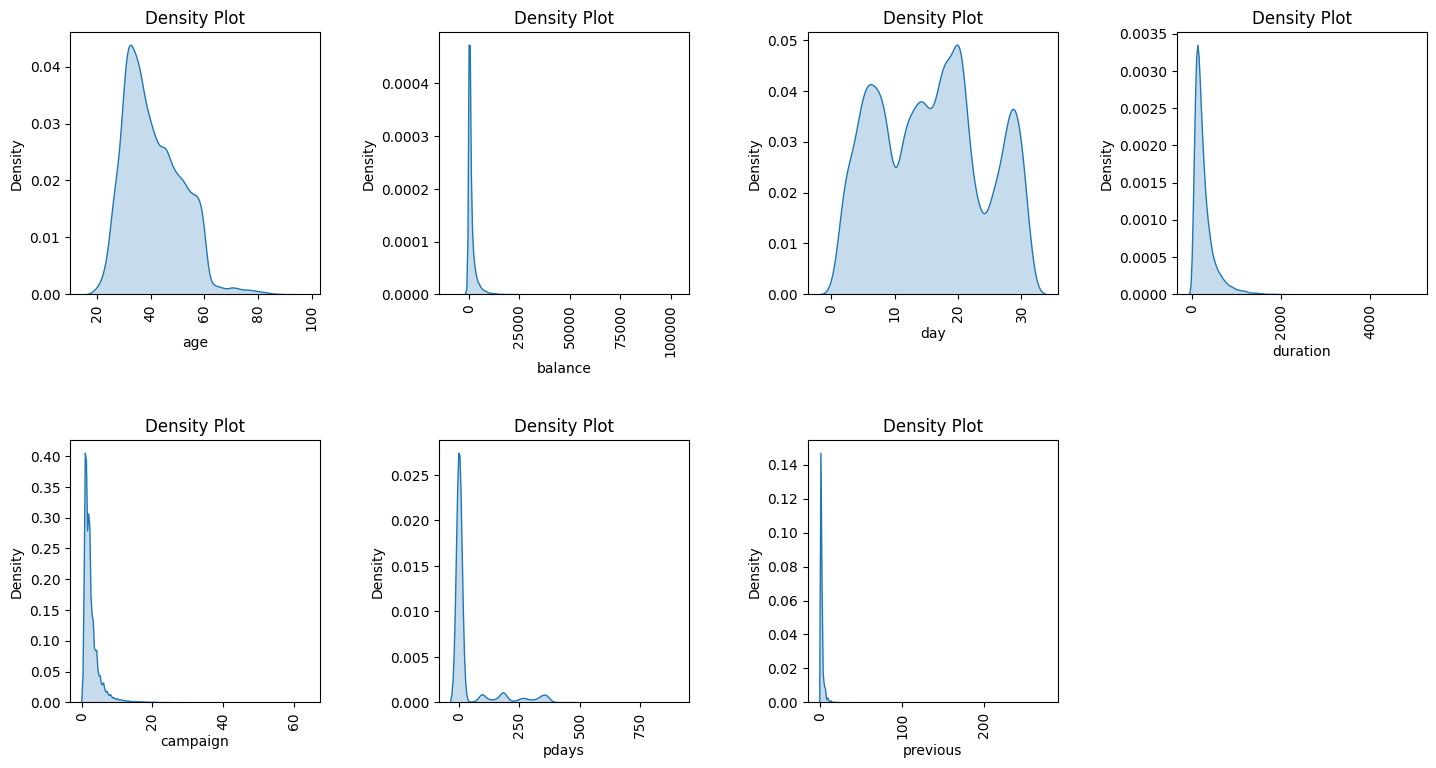

In [219]:
num_cols = bank_full_df.select_dtypes(include= 'number')

plt.figure(figsize=(15, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(data=bank_full_df[variable], shade=True)
    plt.title('Density Plot')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

In [220]:
num_cols.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

**Observations**

1) Balance, Duration, Campaign, pdays and previous are highly skewed to the right, with previous being the most skewed

Bivariate distributions

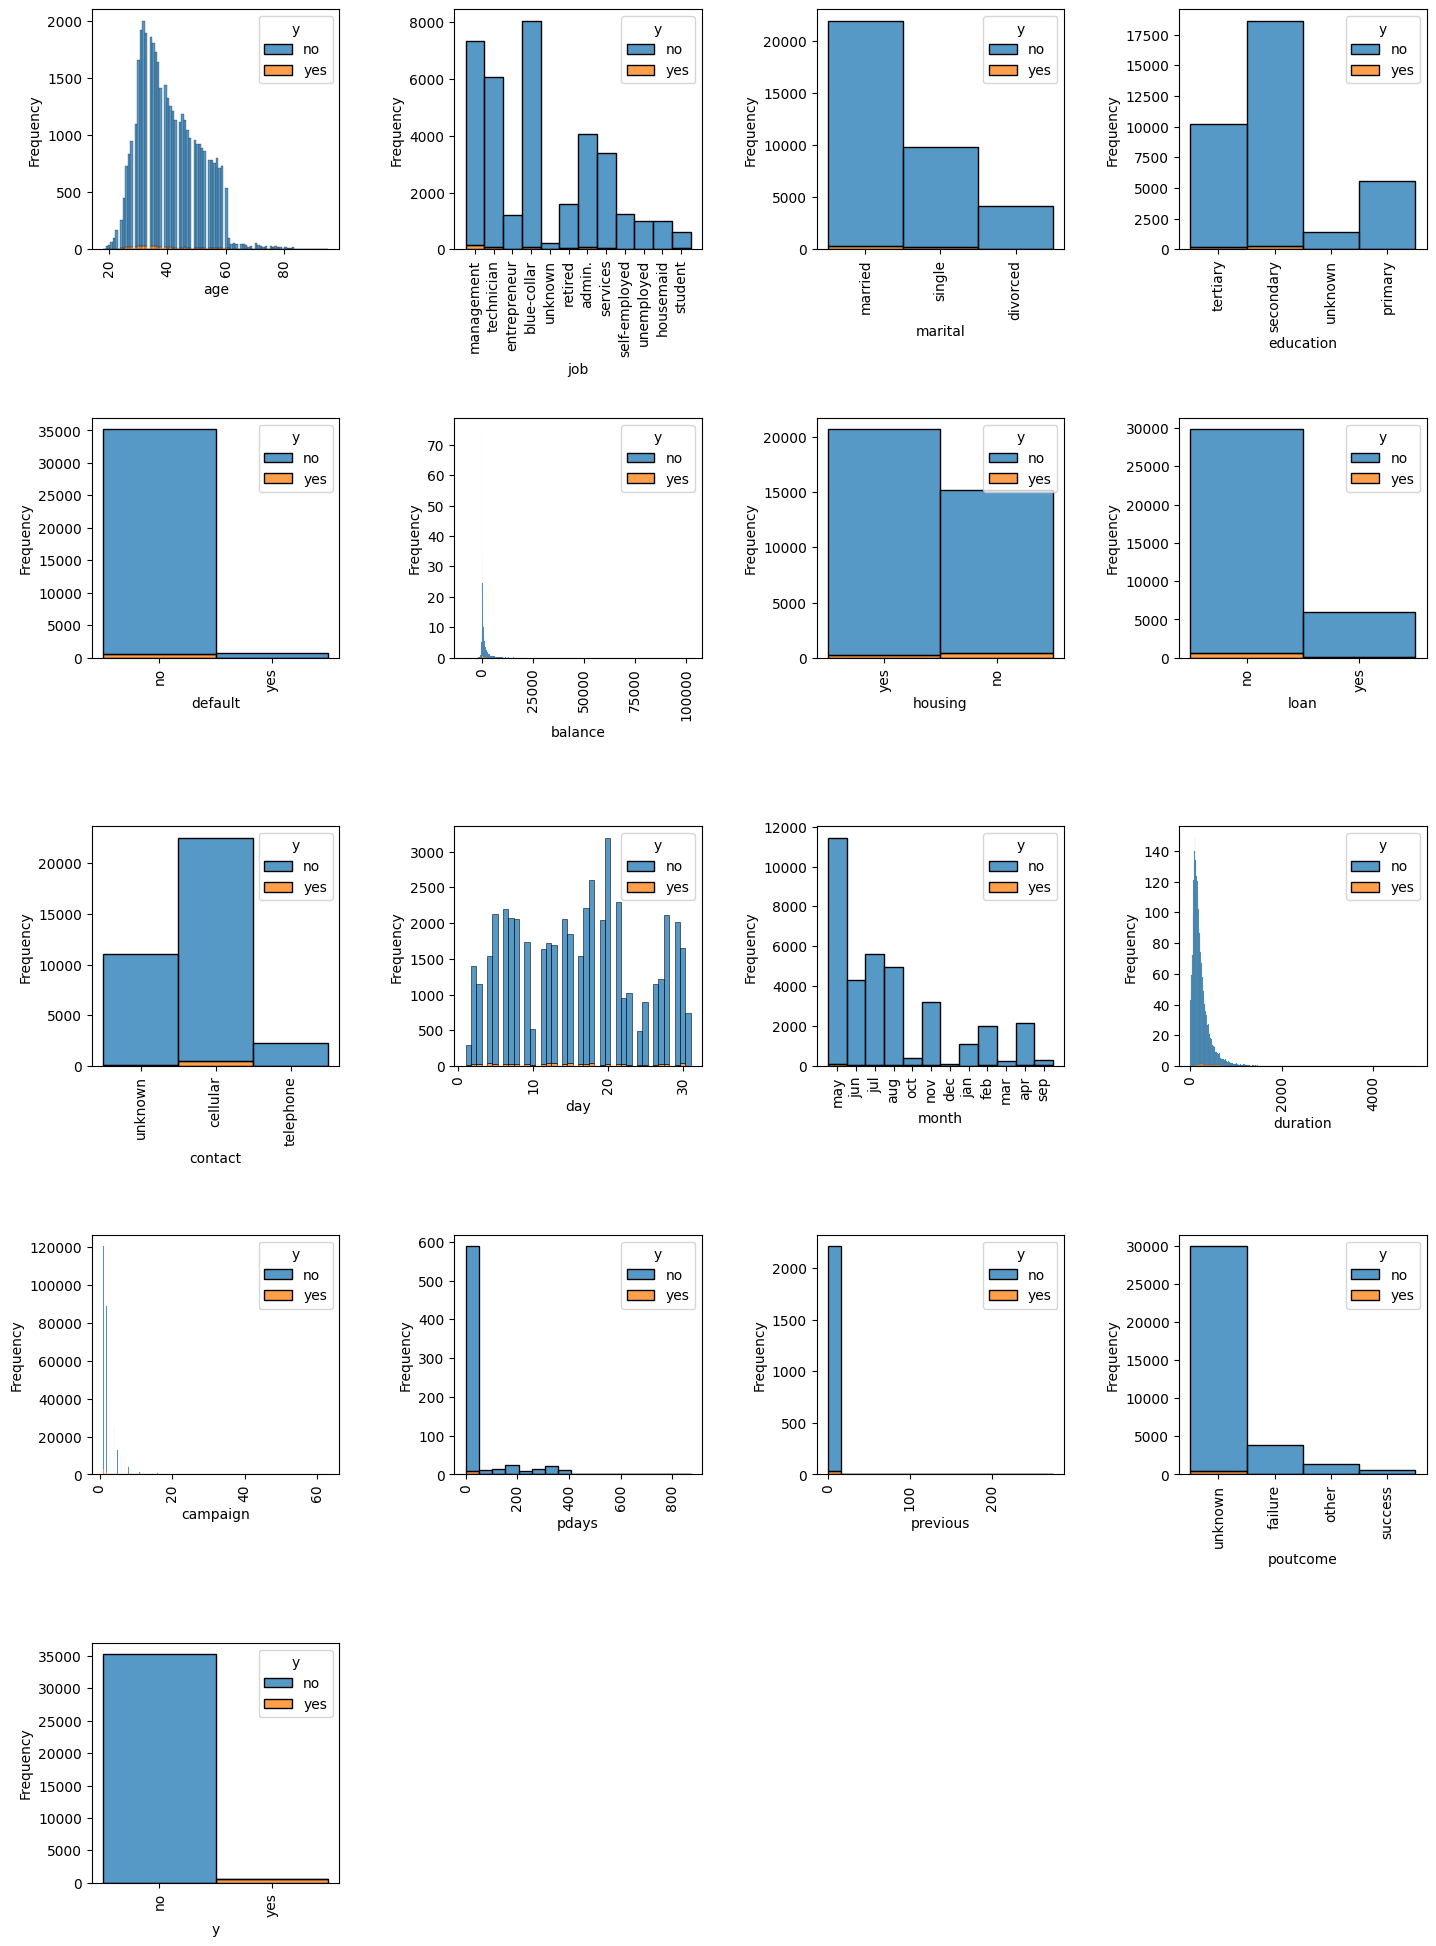

In [221]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(bank_full_df):
    plt.subplot(5,4, i + 1)
    sns.histplot(bank_full_df,x=bank_full_df[variable], stat='frequency', hue='y', multiple='stack')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

**Observations**

At a glance, balance, month and campaign seems to have no effect on term deposit

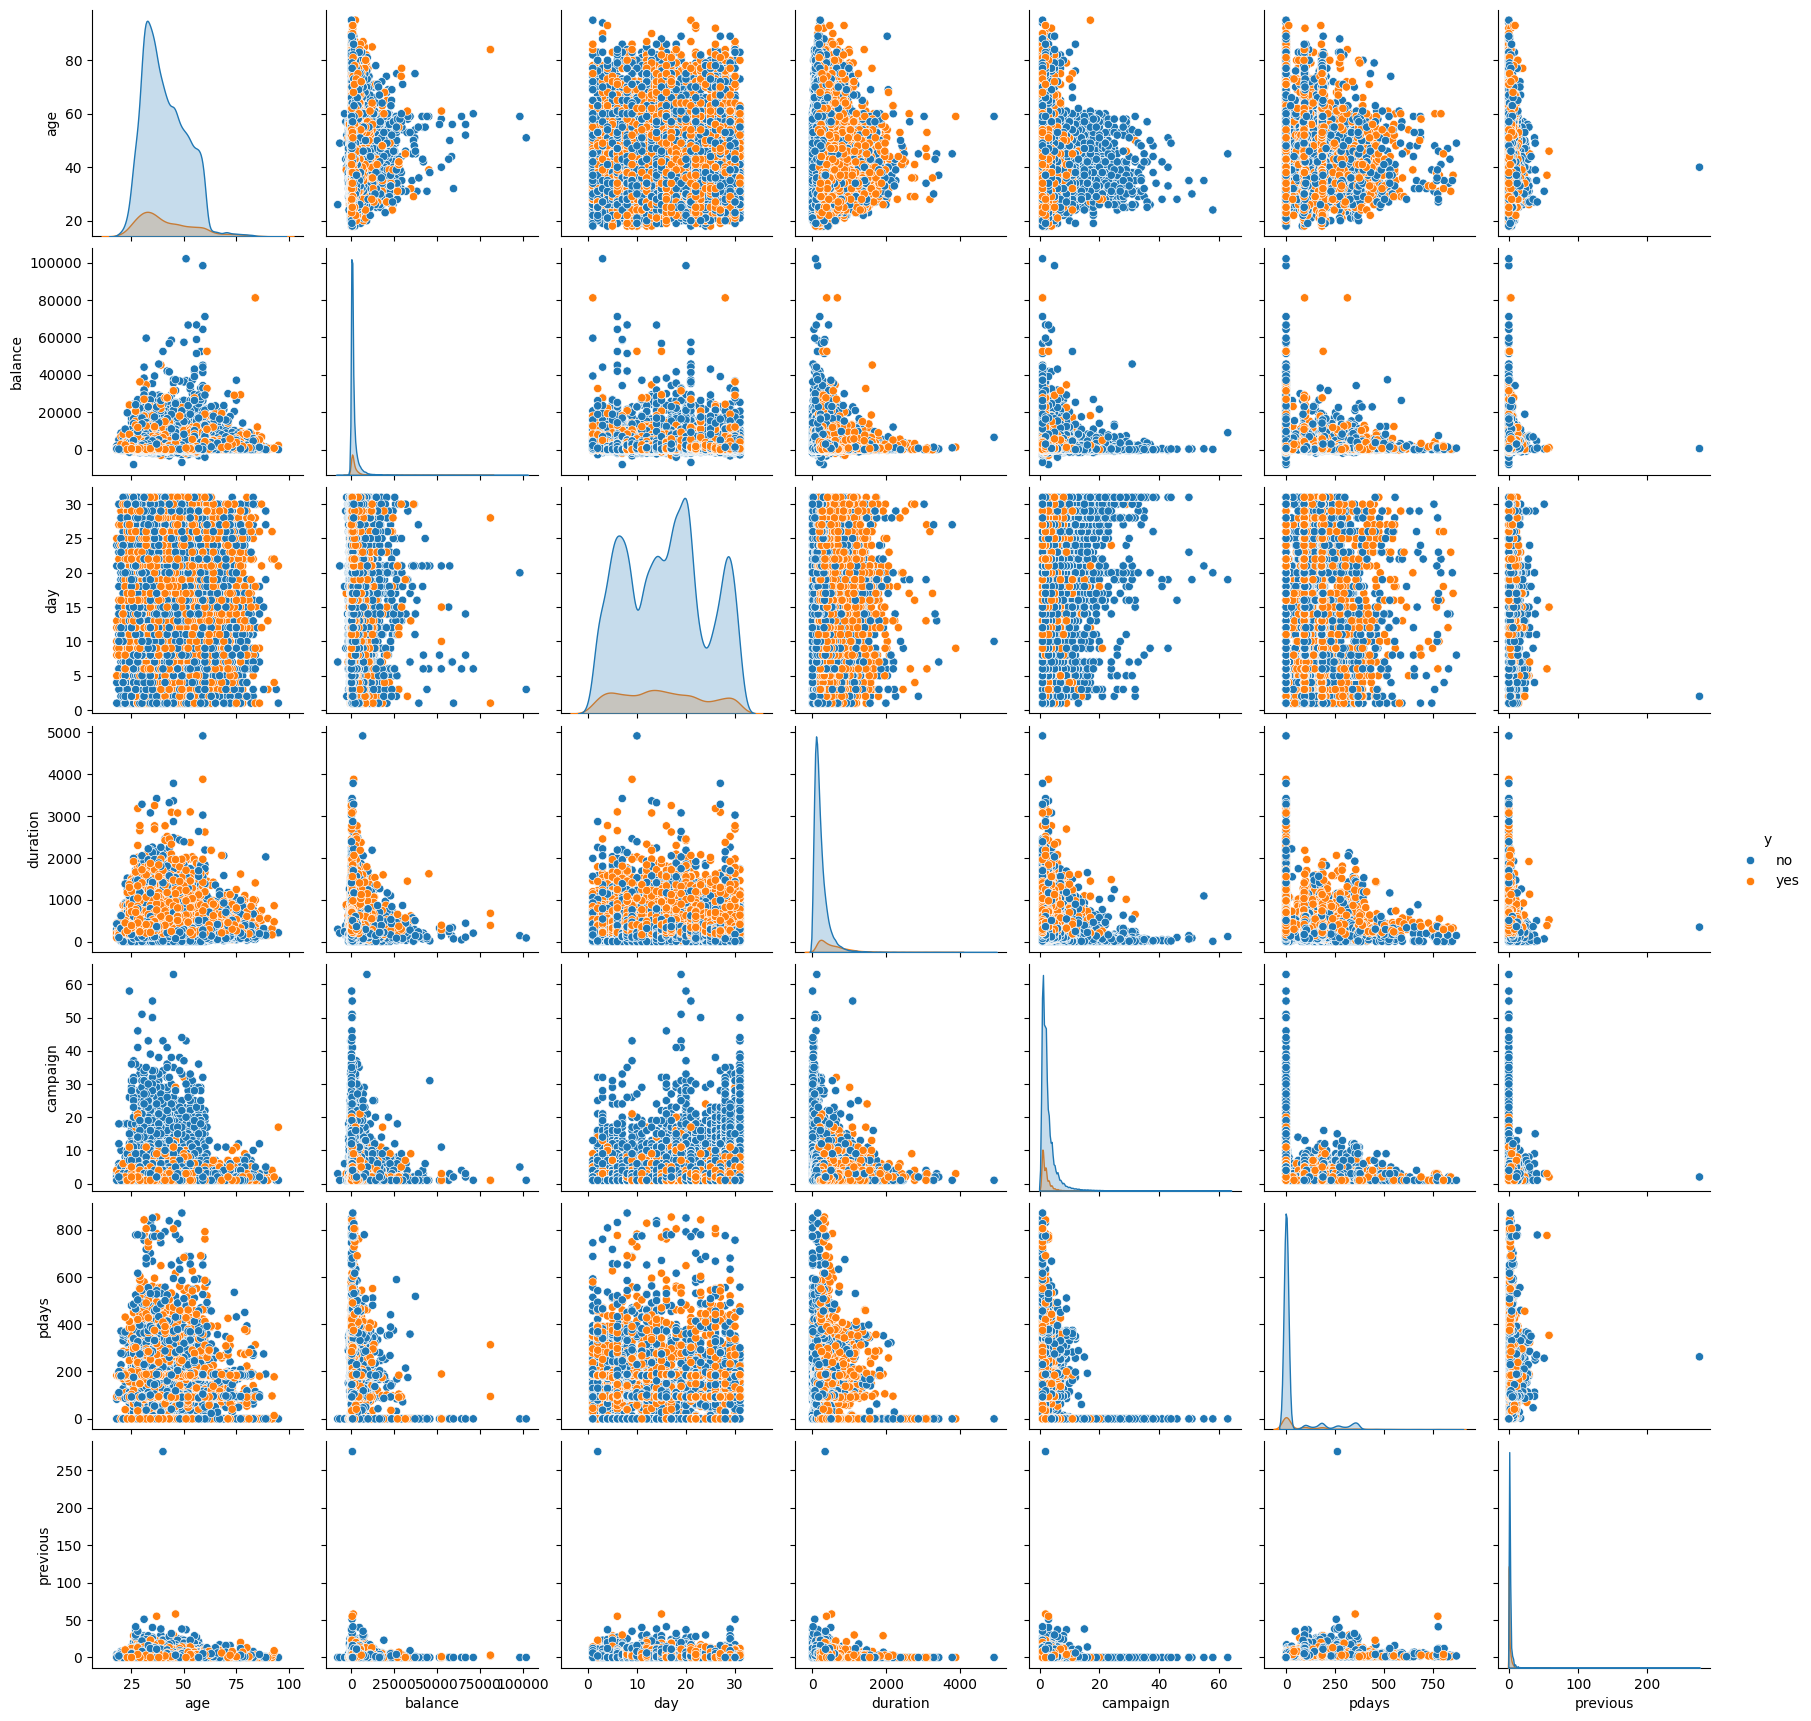

In [222]:
sns.pairplot(data=bank_full_df, hue='y')
plt.show()

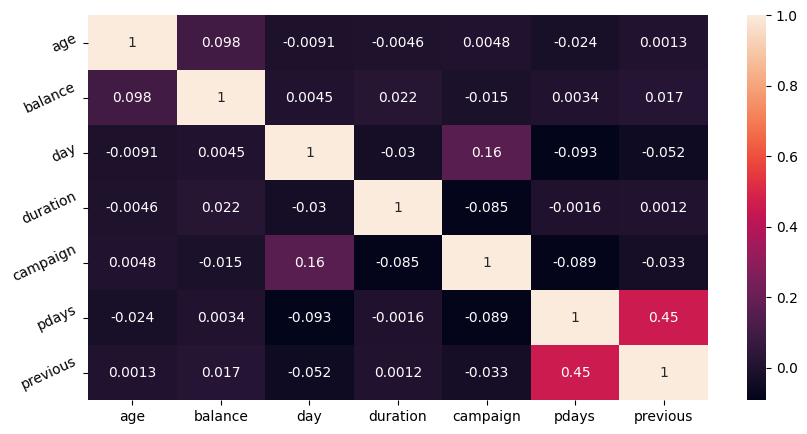

In [223]:
num_cols = bank_full_df.select_dtypes(include= 'number')

plt.figure(figsize=(10, 5))
sns.heatmap(data=num_cols.corr(), annot=True, )
plt.yticks(rotation=25)
plt.show()

**Observations**

There are no significant correlations between the variables, except for the previous (number of previous contacts) and pdays (number of days past by after campaign).

### **Analytical Questions**

##### 1)  How doe age affect whether a bank customer will subscribed a term deposit?

In [224]:

# Define age group bins
bins = [18, 25, 35, 60, 100]  
labels = ['Youth', 'Young Adult', 'Adult', 'Senior'] 

bank_full_df['age_group'] = pd.cut(bank_full_df['age'], bins=bins, labels=labels, right=False)



In [225]:

age_df1 = bank_full_df.groupby(['age_group', 'y']).size().reset_index(name='y Count')

age_df1['Percentage'] = age_df1.groupby('age_group')['y Count'].transform(lambda x: (x / x.sum()) * 100)

# Display the DataFrame
age_df1

,age_group,y,y Count,Percentage
0,Youth,no,602,74.412855
1,Youth,yes,207,25.587145
2,Young Adult,no,12431,87.517601
3,Young Adult,yes,1773,12.482399
4,Adult,no,25705,90.465967
5,Adult,yes,2709,9.534033
6,Senior,no,1184,66.367713
7,Senior,yes,600,33.632287


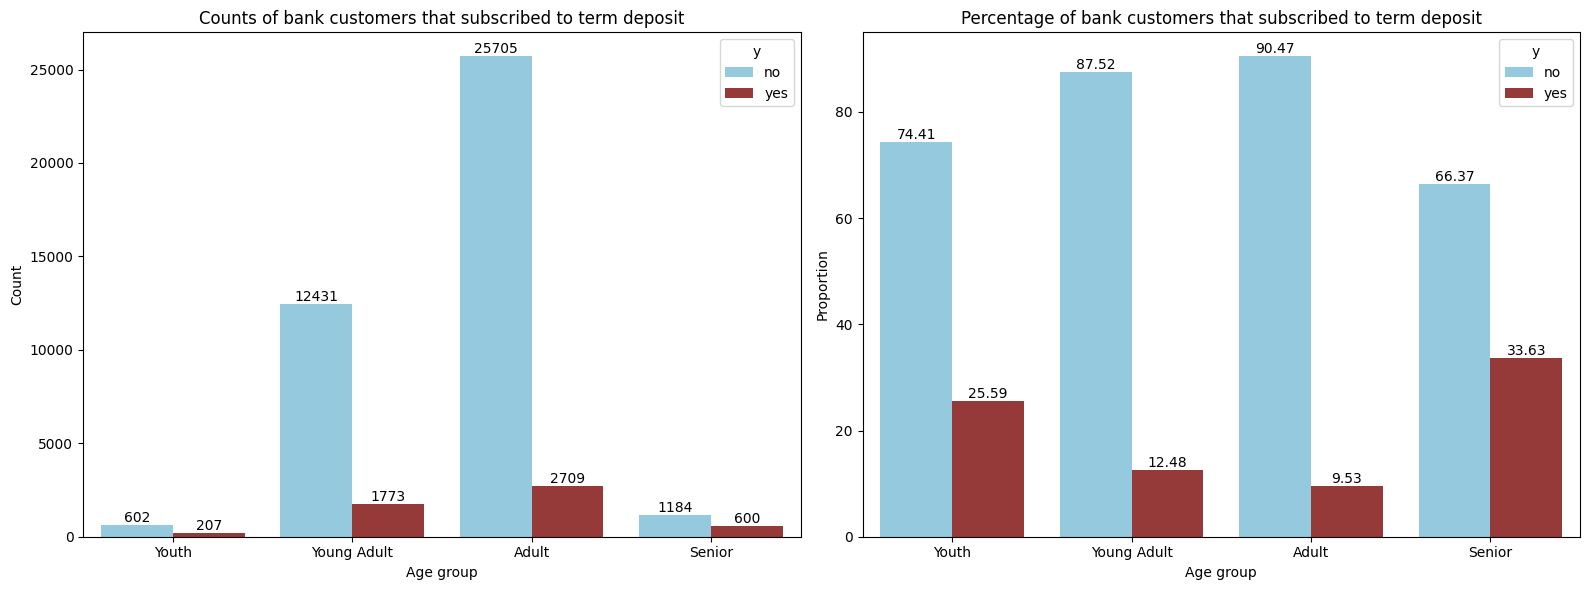

In [226]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.barplot(
    x='age_group', y='y Count', hue='y', 
    data=age_df1, palette=['skyblue', 'brown'], ax=axes[0]
)
axes[0].set_title('Counts of bank customers that subscribed to term deposit')
axes[0].set_xlabel('Age group')
axes[0].set_ylabel('Count')

for container in axes[0].containers:
    axes[0].bar_label(container)

sns.barplot(
    x='age_group', y='Percentage', hue='y', 
    data=age_df1, palette=['skyblue', 'brown'], ax=axes[1]
)
axes[1].set_title('Percentage of bank customers that subscribed to term deposit')
axes[1].set_xlabel('Age group')
axes[1].set_ylabel('Proportion')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

**Observations**

- Young Adult and Adult age groups are more likely to subscribe to the term deposit.

- Proportionately Young Adults are more likely to subscribe to the term deposit than Adults, despite per count it is otherwise.

**Observations**

- Per count Young Adult and Adult age groups had most subscriptions

- In terms of percentage, Youth and Senior age groups had the most subscriptions, with 25.59% and 33.63% respectively.


##### 2) How does marital status and default status affect subscriptions to term deposit?

In [227]:
def_df = bank_full_df.groupby(['default', 'marital'])['y'].value_counts().reset_index()

def_df

,default,marital,y,count
0,no,divorced,no,4468
1,no,divorced,yes,611
2,no,married,no,24031
3,no,married,yes,2735
4,no,single,no,10660
5,no,single,yes,1891
6,yes,divorced,no,117
7,yes,divorced,yes,11
8,yes,married,no,428
9,yes,married,yes,20


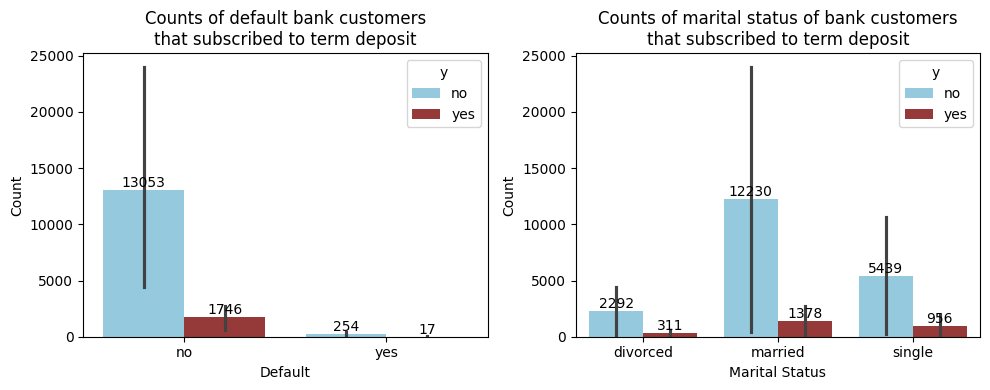

In [228]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# Plot 1: Default vs Count
sns.barplot(
    data=def_df, x='default', y='count', hue='y', 
    palette=['skyblue', 'brown'], ax=axes[0]
)
axes[0].set_title('Counts of default bank customers\nthat subscribed to term deposit')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Count')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')

# Plot 2: Marital Status vs Count
sns.barplot(
    data=def_df, x='marital', y='count', hue='y', 
    palette=['skyblue', 'brown'], ax=axes[1]
)
axes[1].set_title('Counts of marital status of bank customers\nthat subscribed to term deposit')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f')


plt.tight_layout()
plt.show()


**Observations**

- Most of the bank customers who were not defaulted are most likely to subscribed to the term deposit.

- Married customers are most likely to subscribe to the term deposit.

In [229]:
def_df1 = bank_full_df.groupby(['default', 'marital'])['y'].value_counts(normalize=True).reset_index()

def_df1

,default,marital,y,proportion
0,no,divorced,no,0.879701
1,no,divorced,yes,0.120299
2,no,married,no,0.897818
3,no,married,yes,0.102182
4,no,single,no,0.849335
5,no,single,yes,0.150665
6,yes,divorced,no,0.914062
7,yes,divorced,yes,0.085938
8,yes,married,no,0.955357
9,yes,married,yes,0.044643


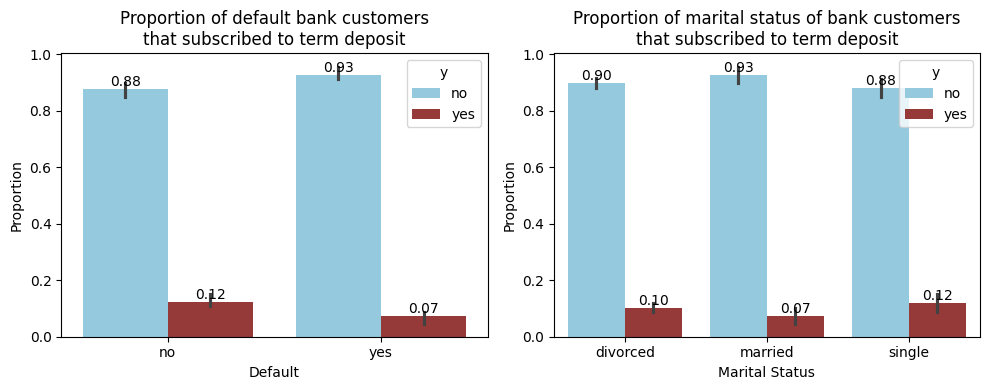

In [230]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)


sns.barplot(
    data=def_df1, x='default', y='proportion', hue='y', 
    palette=['skyblue', 'brown'], ax=axes[0]
)
axes[0].set_title('Proportion of default bank customers\nthat subscribed to term deposit')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Proportion')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')


sns.barplot(
    data=def_df1, x='marital', y='proportion', hue='y', 
    palette=['skyblue', 'brown'], ax=axes[1]
)
axes[1].set_title('Proportion of marital status of bank customers\nthat subscribed to term deposit')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Proportion')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')


plt.tight_layout()
plt.show()


##### 3)  How does contact channel affect customer's subscription to term deposit?

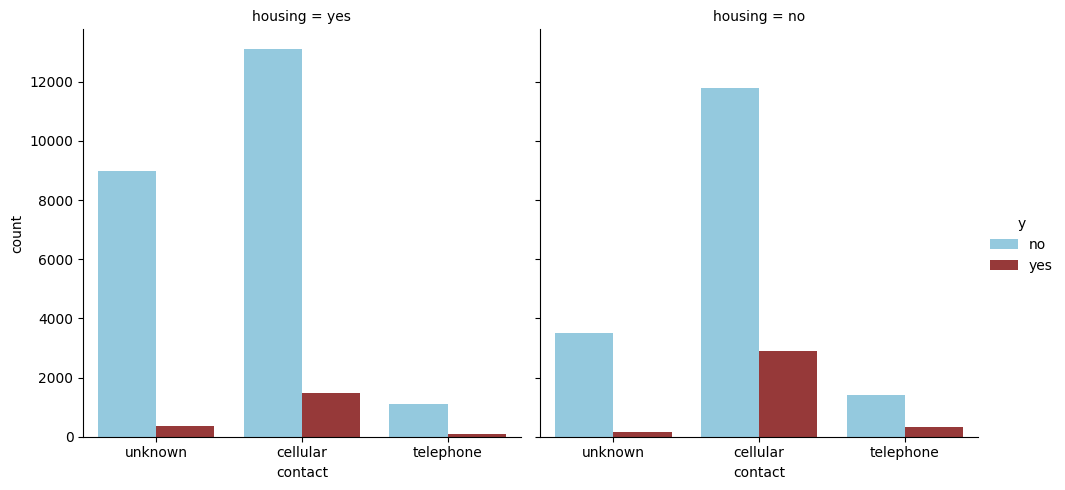

In [231]:
sns.catplot(
    data=bank_full_df, x='contact', hue='y',
    kind='count', col='housing', aspect=1, col_wrap=2, palette=['skyblue', 'brown']
)

plt.show()

**Observations**

- Customers who contacted via cellular are more likely to subscribe to the term deposit whether they have housing loan or not, however those without housing loan are more likely to subscribe to the term deposit than those with housing loan.

##### 4)  How does job type and personal loan affect subscriptions to term deposit?

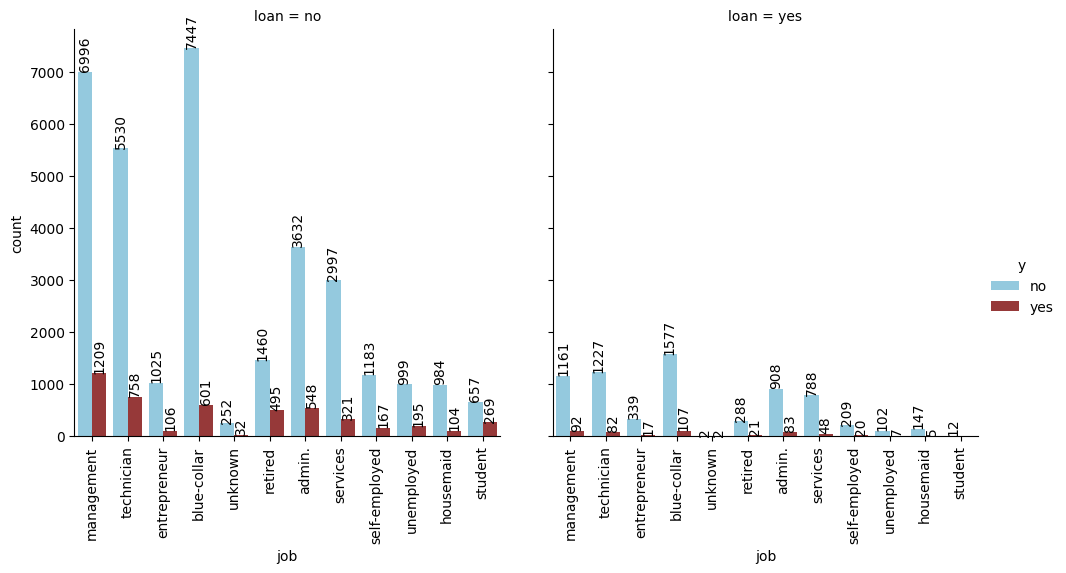

In [232]:

g = sns.catplot(
    data=bank_full_df, x='job', hue='y',
    kind='count', col='loan', aspect=1, col_wrap=2, palette=['skyblue', 'brown'], sharex=True
)

g.set_xticklabels(rotation=90)

for ax in g.axes.flat:  
    for container in ax.containers:  
        ax.bar_label(
            container,
            fmt='%.0f',
            label_type='edge',  
            rotation=90        
        ) 

plt.show()


**Observations**

- Per count customers who are management, technicians, blue-collar, admin and retired, are more likely to subscribe to the term deposit

- in general customers with no personal loans are more likely to subscribe to the term deposit

### Modeling

Checking for inbalance in the target variable y

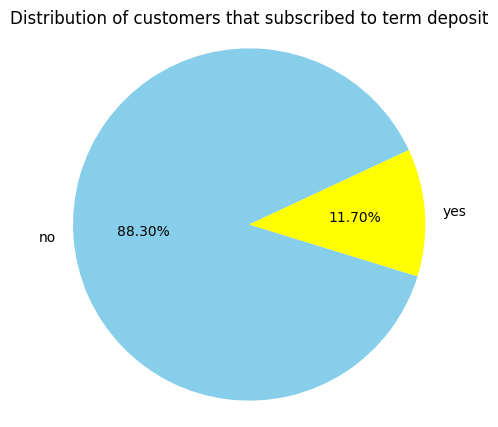

In [233]:
y_counts = bank_full_df['y'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in y_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(y_counts, labels=y_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of customers that subscribed to term deposit')
plt.show()

- We observe very high imbalance of the target variable y, this will be treated with SMOTE in the pipeline

### Feature Engineering

#### Treating Outliers

- Per the univariate analysis, there are outliers in most numerical variables, these will be treated before proceeding with modeling

- This is very necessary to ensure the model performs properly

In [234]:
# Treating outliers
def replace_outliers(bank_full_df):
        for column_name in bank_full_df.select_dtypes(include=['number']).columns:
            Q1 = bank_full_df[column_name].quantile(0.25)
            Q3 = bank_full_df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            LOWER_BOUND = Q1 - 1.5 * IQR
            UPPER_BOUND = Q3 + 1.5 * IQR

            bank_full_df[column_name] = bank_full_df[column_name].apply(lambda x: UPPER_BOUND if x> UPPER_BOUND else (LOWER_BOUND if x< LOWER_BOUND else x))

        return bank_full_df

checking if outliers treated

In [235]:
bank_full_df1= replace_outliers(bank_full_df)

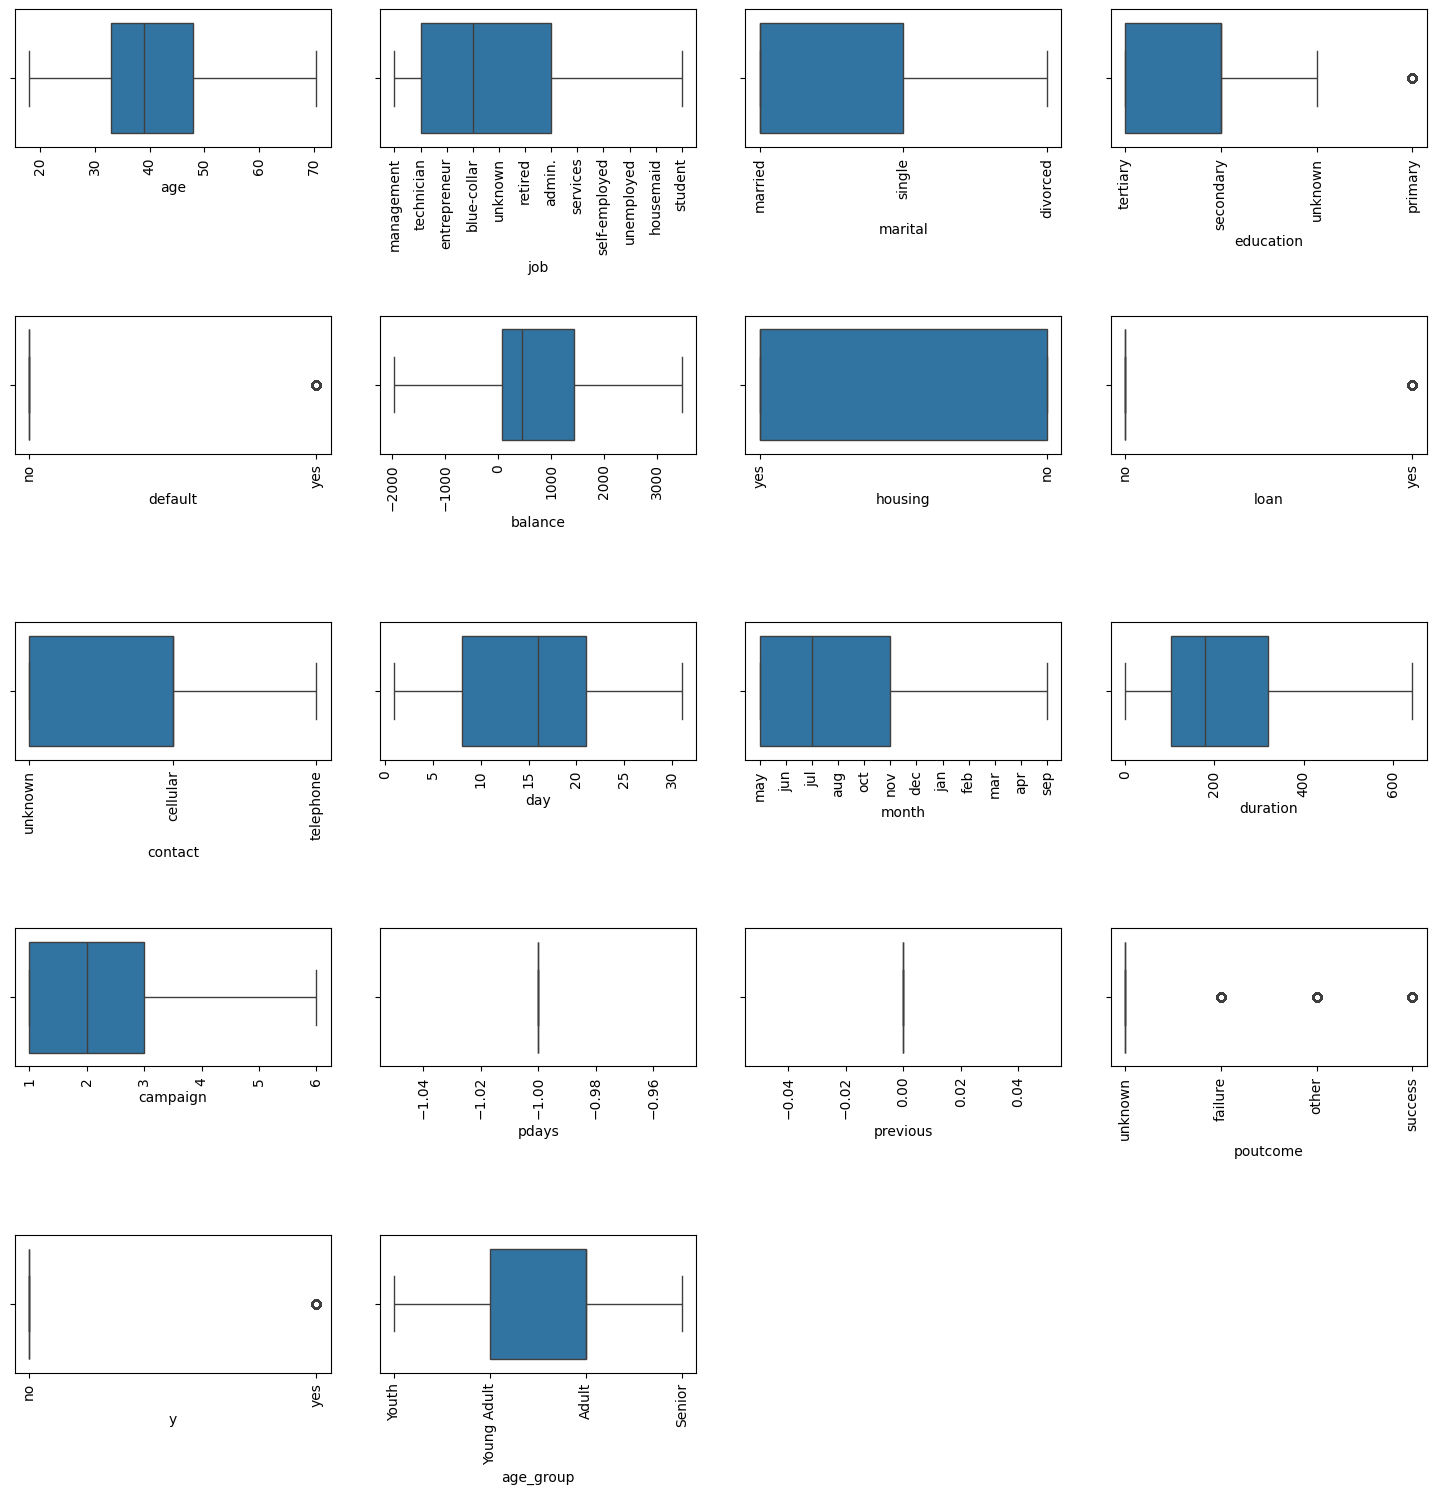

In [236]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(bank_full_df1):
    plt.subplot(5,4, i + 1)
    sns.boxplot(bank_full_df1,x=bank_full_df1[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

#### Dataset Splitting

In [237]:
X = bank_full_df1.drop(columns=['y']) 

y = bank_full_df1['y'] 

In [238]:
#Checking for null values in X
X.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
age_group    0
dtype: int64

In [239]:
#checking for null values in y
y.isnull().sum()

np.int64(0)

In [240]:
# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [241]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (33908, 17)
X_eval shape: (11303, 17)
y_train shape: (33908,)
y_eval shape: (11303,)


Label Encoding

In [242]:
#Encoding y
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)

#### Creating pipeline  


In [243]:
num_cols=X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns

# Define pipelines for object and numerical columns
cat_pipeline=Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
    
])

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine the pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols),
    ('num', num_pipeline, num_cols)
])

#### Models

In [244]:
models={}
models['Logistic_Regression']= LogisticRegression(random_state=42)
models['Support_Vector_Machine']= LinearSVC(random_state=42)
models['Decision_Tree']= DecisionTreeClassifier(random_state=42)
models['Random_Forest']= RandomForestClassifier(random_state=42)
models['K-Nearest_Neighbors']= KNeighborsClassifier()
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=42)
models['XGBoost']= XGBClassifier(random_state=42)

In [245]:
all_pipelines = {}
metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)]=[model_name, accuracy, precision, recall, f1_score]

metric_table.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
3,Random_Forest,0.899850,0.897783,0.899850,0.898767
6,XGBoost,0.898876,0.897142,0.898876,0.897976
5,Gradient_Boosting,0.875962,0.911194,0.875962,0.887966
2,Decision_Tree,0.869415,0.880338,0.869415,0.874296
4,K-Nearest_Neighbors,0.839600,0.894471,0.839600,0.858539
1,Support_Vector_Machine,0.833938,0.906167,0.833938,0.856599
0,Logistic_Regression,0.833407,0.904880,0.833407,0.856004


Model tuning

In [174]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, num_cols),
    ('cat_pipeliner', cat_pipeline, cat_cols)
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {
        'logistic_regression__C': [1, 2, 3], 
        'logistic_regression__random_state':[1,2,3,4], 
        'logistic_regression__solver': ['newton-cg'], 
        'logistic_regression__multi_class': ['multinomial']},
    'Support_Vector_Machine': {
        'support_vector_machine__C': [1, 2, 3, 4, 5], 
        'support_vector_machine__random_state':[1,2,3,4]},
    
    'Decision_Tree': {
        'decision_tree__max_depth': [2, 3, 4, 5, 6], 
        'decision_tree__random_state':[1,2,3,4,5], 
        'decision_tree__criterion': ['gini', 'entropy'], 
        'decision_tree__splitter': ['best', 'random'], 
        'decision_tree__max_features': ['sqrt', 'log2']},

    'Random_Forest': {
        'random_forest__n_estimators': [2, 5, 10, 15, 20], 
        'random_forest__max_depth': [5, 10, 20, 30], 
        'random_forest__random_state':[1,10,11,12,13,14], 
        'random_forest__criterion': ['gini', 'entropy'], 
        'random_forest__max_features': ['sqrt', 'log2'], 
        'random_forest__bootstrap': [True, False], 
        'random_forest__oob_score': [True, False]},
    
    'Gradient_Boosting': {
        'gradient_boosting__n_estimators': [10, 20, 30, 50, 60, 70], 
        'gradient_boosting__max_depth': [2, 3, 4, 5], 
        'gradient_boosting__learning_rate': [0.01, 0.1, 1], 
        'gradient_boosting__random_state':[1], 
        'gradient_boosting__loss': ['deviance', 'exponential'], 
        'gradient_boosting__criterion': ['friedman_mse', 'squared_error']},
    
    'XGBoost': {
        'xgboost__n_estimators': [20, 30, 40], 
        'xgboost__max_depth': [2, 3, 4, 5, 10], 
        'xgboost__random_state':[1,3, 5], 
        'xgboost__learning_rate': [0.001, 0.01, 0.1, 1], 
        'xgboost__booster': ['gbtree', 'gblinear'], 
        'xgboost__verbosity': [0]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting', 'XGBoost']:
        print(f"\nTuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)


Tuning Logistic_Regression...
Best parameters: {'logistic_regression__C': 3, 'logistic_regression__multi_class': 'multinomial', 'logistic_regression__random_state': 1, 'logistic_regression__solver': 'newton-cg'}
Best score: 0.856671565558095

Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 1, 'support_vector_machine__random_state': 1}
Best score: 0.8558166323605301

Tuning Decision_Tree...
Best parameters: {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 3, 'decision_tree__max_features': 'sqrt', 'decision_tree__random_state': 2, 'decision_tree__splitter': 'best'}
Best score: 0.863981174494268

Tuning Random_Forest...
Best parameters: {'random_forest__bootstrap': False, 'random_forest__criterion': 'gini', 'random_forest__max_depth': 20, 'random_forest__max_features': 'log2', 'random_forest__n_estimators': 20, 'random_forest__oob_score': False, 'random_forest__random_state': 13}
Best score: 0.895537467239361
Best parameters: {'random_fores

In [247]:
tuned_models={}
tuned_models['Logistic_Regression_tuned']= LogisticRegression(C=3, multi_class='multinomial', random_state=1, solver='newton-cg')
tuned_models['Support_Vector_Machine_tuned']= LinearSVC(C=1, random_state=1)
tuned_models['Decision_Tree_tuned']= DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='sqrt', random_state=2, splitter='best')
tuned_models['Random_Forest_tuned']= RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features='log2', n_estimators=20, oob_score=False, random_state=13)
tuned_models['K-Nearest_Neighbors']= KNeighborsClassifier()
tuned_models['Gradient_Boosting_tuned']= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=1, loss='exponential', max_depth=2, n_estimators=70, random_state=1)
tuned_models['XGBoost_tuned']= XGBClassifier(booster='gbtree', learning_rate=1, max_depth=4, n_estimators=40, random_state=1, verbosity=0)

In [248]:
all_tuned_pipelines = {}
metric_table_tuned = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models.items(): 
    tuned_balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    tuned_balanced_pipeline.fit(X_train, y_train_encode)
    all_tuned_pipelines[model_name] = tuned_balanced_pipeline
    
    y_pred=tuned_balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_tuned.loc[len(metric_table_tuned)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_tuned.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
6,XGBoost_tuned,0.897549,0.898157,0.897549,0.897849
5,Gradient_Boosting_tuned,0.894895,0.898343,0.894895,0.896514
3,Random_Forest_tuned,0.890560,0.899088,0.890560,0.894287
4,K-Nearest_Neighbors,0.839600,0.894471,0.839600,0.858539
1,Support_Vector_Machine_tuned,0.833938,0.906167,0.833938,0.856599
0,Logistic_Regression_tuned,0.833584,0.904920,0.833584,0.856140
2,Decision_Tree_tuned,0.491728,0.850391,0.491728,0.570841


Filtering out the best model

In [249]:
df_best_model = pd.concat([metric_table, metric_table_tuned], ignore_index= True).sort_values(by='f1-score', ascending=False).head(4)

df_best_model

,model_name,accuracy,precision,recall,f1-score
3,Random_Forest,0.899850,0.897783,0.899850,0.898767
6,XGBoost,0.898876,0.897142,0.898876,0.897976
13,XGBoost_tuned,0.897549,0.898157,0.897549,0.897849
12,Gradient_Boosting_tuned,0.894895,0.898343,0.894895,0.896514


In [250]:
all_best_models = {}

all_best_models['Random_Forest']= RandomForestClassifier(random_state=42)
all_best_models['XGBoost']= XGBClassifier(random_state=42)
all_best_models['XGBoost_tuned']= XGBClassifier(booster='gbtree', learning_rate=1, max_depth=4, n_estimators=40, random_state=1, verbosity=0)
all_best_models['Gradient_Boosting_tuned']= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=1, loss='exponential', max_depth=2, n_estimators=70, random_state=1)

In [262]:
best_confusion_matrices = {}
best_pipelines = {}
best_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in all_best_models.items(): 
    best_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    best_pipeline.fit(X_train, y_train_encode)
    best_pipelines[model_name] = best_pipeline
    
    y_pred=best_pipeline.predict(X_eval)
    
    best_conf_matrix = confusion_matrix(y_eval_encode, y_pred)
    
    best_confusion_matrices[model_name] = best_conf_matrix
    
    best_metrics = classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=best_metrics['accuracy']
    precision=best_metrics['weighted avg']['precision']
    recall=best_metrics['weighted avg']['recall']
    f1_score=best_metrics['weighted avg']['f1-score']
    
    best_metric_table.loc[len(best_metric_table)]=[model_name, accuracy, precision, recall, f1_score]

best_metric_table.sort_values(by='f1-score', ascending=False)


,model_name,accuracy,precision,recall,f1-score
0,Random_Forest,0.899850,0.897783,0.899850,0.898767
1,XGBoost,0.898876,0.897142,0.898876,0.897976
2,XGBoost_tuned,0.897549,0.898157,0.897549,0.897849
3,Gradient_Boosting_tuned,0.894895,0.898343,0.894895,0.896514


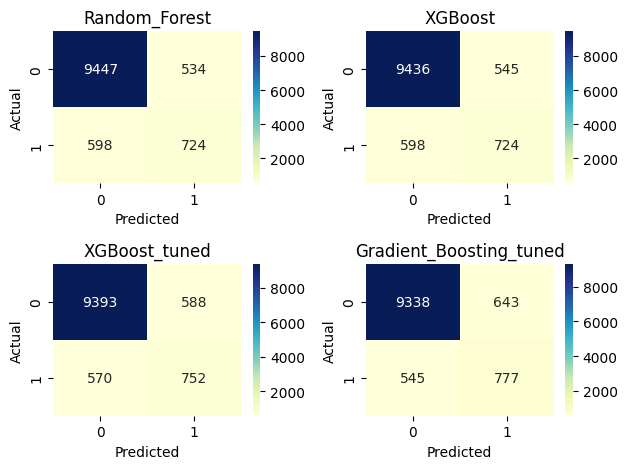

In [252]:
for i, (model_name, confusion_mat) in enumerate(best_confusion_matrices.items()):
    plt.subplot(2, 2, i + 1)  # Adjust subplot grid as needed
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


plt.tight_layout()  
plt.show()

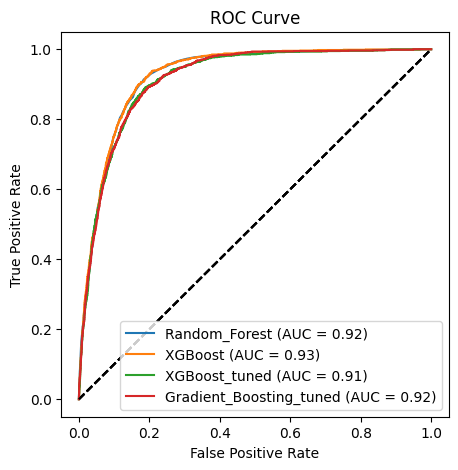

In [253]:
fig, ax = plt.subplots(figsize=(5, 5))
best_confusion_matrices = {}

all_roc_data = {}

# Iterate over the dictionary items directly
for model_name, pipeline in best_pipelines.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_eval_encode, y_score)
    roc_auc = auc(fpr, tpr)
    
    
    roc_data_df = pd.DataFrame({'false_positive_rate': fpr, 'true_positive_rate': tpr, 'thresholds': thresholds})
    
    # Store the ROC data in the dictionary
    all_roc_data[model_name] = roc_data_df
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend(loc="lower right")
plt.show()

Best Performing Models per ROC Curves

- XGBoost, Random_Forest and Gradient_Boosting_tuned with AUC scores of 0.93, 0.92, 0.92 respectively

In [264]:
all_roc_data['XGBoost']

,false_positive_rate,true_positive_rate,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.000756,0.991098
2,0.000100,0.000756,0.990047
3,0.000100,0.005295,0.978489
4,0.000301,0.005295,0.977539
...,...,...,...
1490,0.968741,0.999244,0.000121
1491,0.968741,1.000000,0.000121
1492,0.978760,1.000000,0.000087
1493,0.978960,1.000000,0.000087


In [ ]:
XGB_pipeline = best_pipelines['XGBoost']
XGB_pipeline

In [267]:
RF_pipeline = best_pipelines['Random_Forest']
RF_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [268]:
GB_pipeline = best_pipelines['Gradient_Boosting_tuned']
GB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1, loss='exponential',
                                            max_depth=2, n_estimators=70,
                                            random_state=1))])

Testing Models

Predicting with XGB_pipeline

In [269]:
XGB_pred_y = XGB_pipeline.predict(bank_df)
XGB_pred_y

array([0, 0, 0, ..., 0, 0, 0], shape=(4521,))

In [270]:
encoder.inverse_transform(XGB_pred_y)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'],
      shape=(4521,), dtype=object)

In [271]:
bank_df['XGB_y'] = encoder.inverse_transform(XGB_pred_y)
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,XGB_y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,yes
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,no


Predicting with GB_pipeline

In [272]:
GB_pred_y = GB_pipeline.predict(bank_df)
GB_pred_y

array([0, 0, 0, ..., 0, 0, 0], shape=(4521,))

In [273]:
encoder.inverse_transform(GB_pred_y)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'],
      shape=(4521,), dtype=object)

In [274]:
bank_df['GB_y'] = encoder.inverse_transform(GB_pred_y)
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,XGB_y,GB_y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,yes,yes
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,no,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,no,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,no,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,no,no


Predicting with RF_pipeline

In [275]:
RF_pred_y = RF_pipeline.predict(bank_df)
RF_pred_y

array([0, 0, 0, ..., 0, 0, 0], shape=(4521,))

In [276]:
encoder.inverse_transform(RF_pred_y)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'],
      shape=(4521,), dtype=object)

In [277]:
bank_df['RF_y'] = encoder.inverse_transform(RF_pred_y)
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,XGB_y,GB_y,RF_y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no,no,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,yes,yes,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,no,no,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,no,no,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,no,no,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,no,no,no


**Observations**

- The Random Forest pipeline predicted the first 10 customers correctly

In [281]:
joblib.dump(XGB_pipeline, './models/XGB_pipeline.joblib')
joblib.dump(GB_pipeline, './models/GB_pipeline.joblib')
joblib.dump(RF_pipeline, './models/RF_pipeline.joblib')
joblib.dump(encoder, './models/encoder.joblib')

['./models/encoder.joblib']

### Findings


- Per count customers who are management, technicians, blue-collar, admin and retired, are more likely to subscribe to the term deposit

- In general customers with no personal loans are more likely to subscribe to the term deposit

- Customers who contacted via cellular are more likely to subscribe to the term deposit whether they have housing loan or not, however those without housing loan are more likely to subscribe to the term deposit than those with housing loan.

- Most of the bank customers who were not defaulted are most likely to subscribed to the term deposit.

- Married customers are most likely to subscribe to the term deposit.

- Young Adult and Adult age groups are more likely to subscribe to the term deposit.

- Proportionately Young Adults are more likely to subscribe to the term deposit than Adults, despite per count it is otherwise.

### Recommendations

- Improve customer contact channels by focusing on cellular and telephone contact methods, as they are more likely to reach customers.

- Implement a more targeted marketing campaign targeting customers with no personal and housing loan.

- Offer a more personalized marketing campaign to customers who are married and young adults.

- Offer a better deal for customers who did not default, as they are more likely to subscribe to the term deposit.

- Offer more personalized marketing campaign to customers who are employed as management, technician, blue-collar and retired, since they are more likely to subscribe to the term deposit.
